In [1]:
# code linear regression from scratch

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [19]:
def mse(y, y_pred):
    return np.square(y - y_pred).mean()

In [90]:
def rmse(y, y_pred):
    return np.sqrt(np.square(y - y_pred).mean())

In [20]:
def mae(y, y_pred):
    return np.abs(y - y_pred).mean()

In [73]:
def r2(y, y_pred):
    ss_res = np.square(y - y_pred).sum()
    ss_tot = np.square(y - y.mean()).sum()
    return 1 - ss_res / ss_tot

In [95]:
np.random.seed(1234)
n, m = 10000, 20
X = np.random.randn(n, m)
true_coef = np.random.randn(m)
true_bias = np.random.randn()
y = X.dot(true_coef) + true_bias

In [96]:
np.random.seed(123)
frac_test = .2
test_idx = np.random.random(len(X)) < frac_test
X_train, X_test, y_train, y_test = X[~test_idx], X[test_idx], y[~test_idx], y[test_idx]

In [97]:
np.random.seed(456)
coef = np.random.random(m)
bias = np.random.randn()
y_pred = X_train.dot(coef) + bias
print(mse(y_train, y_pred), mae(y_train, y_pred), r2(y_train, y_pred))

28.00585258866958 4.214212681606484 -0.6540199278197727


In [98]:
rate = 0.01
n_steps = 1000
stats = []
for i in range(n_steps):
    gr = 1. / len(X_train) * ((X_train.dot(coef) + bias) - y_train)
    coef_grad = gr.dot(X_train)
    bias_grad = gr.sum() * 1
    coef, bias = coef - rate * coef_grad, bias - rate * bias_grad  # want to minimize
    y_pred = X_train.dot(coef) + bias
    if i % (n_steps // 100) == 0:
        my_mse, my_mae, my_r2 = mse(y_train, y_pred), mae(y_train, y_pred), r2(y_train, y_pred)
        y_pred_test = X_test.dot(coef) + bias
        my_mse_test, my_mae_test, my_r2_test = \
            mse(y_test, y_pred_test), mae(y_test, y_pred_test), r2(y_test, y_pred_test)
        stats.append({
            'i': i,
            'mse': my_mse,
            'rmse': np.sqrt(my_mse),
            'mae': my_mae,
            'r^2': my_r2,
            'mse test': my_mse_test,
            'rmse test': np.sqrt(my_mse_test),
            'mae test': my_mae_test,
            'r^2 test': my_r2_test,
        })
        if i % (n_steps // 10) == 0:
            print("MSE %7.4f  MAE %7.4f  R^2 %7.4f" % (my_mse, my_mae, my_r2))
stats = pd.DataFrame(stats).set_index('i')

MSE 27.4532  MAE  4.1724  R^2 -0.6214
MSE  3.7616  MAE  1.5454  R^2  0.7778
MSE  0.5210  MAE  0.5758  R^2  0.9692
MSE  0.0729  MAE  0.2156  R^2  0.9957
MSE  0.0103  MAE  0.0812  R^2  0.9994
MSE  0.0015  MAE  0.0307  R^2  0.9999
MSE  0.0002  MAE  0.0117  R^2  1.0000
MSE  0.0000  MAE  0.0044  R^2  1.0000
MSE  0.0000  MAE  0.0017  R^2  1.0000
MSE  0.0000  MAE  0.0007  R^2  1.0000


In [99]:
coef_grad

array([-2.27059535e-05,  1.95100256e-05,  3.75238376e-05,  4.69249596e-05,
        5.05044888e-05,  3.73234267e-06,  8.48731147e-05,  1.39714304e-05,
       -1.06574320e-04,  4.99082673e-08,  1.68681114e-05, -1.25226809e-05,
        1.07918960e-04, -2.98074159e-05, -9.27730686e-05, -6.46943141e-05,
        1.75082686e-04,  6.84644517e-05,  3.72304767e-05,  7.58541361e-05])

In [100]:
stats.head()

,mse,rmse,mae,r^2,mse test,rmse test,mae test,r^2 test
i,,,,,,,,
0,27.453170,5.239577,4.172436,-0.621379,27.345410,5.229284,4.157769,-0.572761
10,22.493436,4.742725,3.776928,-0.328458,22.416196,4.734574,3.764641,-0.289259
20,18.431763,4.293223,3.419093,-0.088576,18.377500,4.286899,3.408824,-0.056975
30,15.105174,3.886537,3.095337,0.107892,15.068081,3.881763,3.086781,0.133365
40,12.380332,3.518570,2.802427,0.268820,12.355956,3.515104,2.795312,0.289352


<Axes: xlabel='i'>

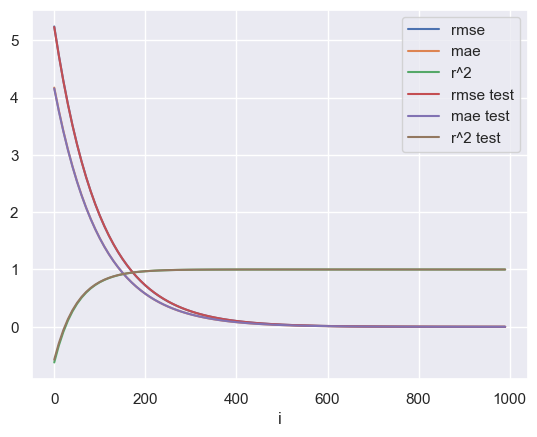

In [105]:
cols = ['rmse', 'mae', 'r^2', 'rmse test', 'mae test', 'r^2 test']
stats[cols].plot()
# [['ll', 'auc']].plot()
# stats.columns

(0.98, 1.0)

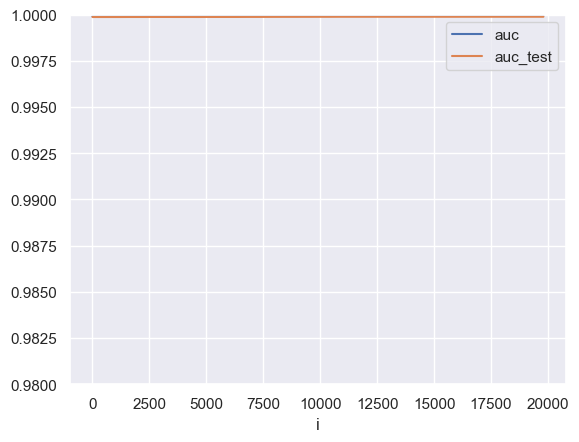

In [464]:
ax = stats[['auc', 'auc_test']].plot()
ax.set_ylim(.98, 1)